# Assignment 2
## Part 1 Data Exploration
Load the diabetes bunch into a variable and print out its description 

In [1]:
from sklearn.datasets import load_diabetes
diabetes_bunch = load_diabetes()
print(diabetes_bunch['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Load the diabetes features into a pandas dataframe with the proper column names.

In [2]:
import pandas as pd
diabetes_df = pd.DataFrame(diabetes_bunch['data'])
diabetes_df.columns = diabetes_bunch['feature_names']
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


Add the target variable to this same dataframe and run a command to look at the data types of
the dataframe to see if there is any missing data

In [3]:
diabetes_df['progression'] = diabetes_bunch['target']
diabetes_df.dtypes

age            float64
sex            float64
bmi            float64
bp             float64
s1             float64
s2             float64
s3             float64
s4             float64
s5             float64
s6             float64
progression    float64
dtype: object

Perform descriptive statistics on the numeric columns of the dataframe.

In [4]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


Plot histograms of the data to get a feel for each column’s distribution.

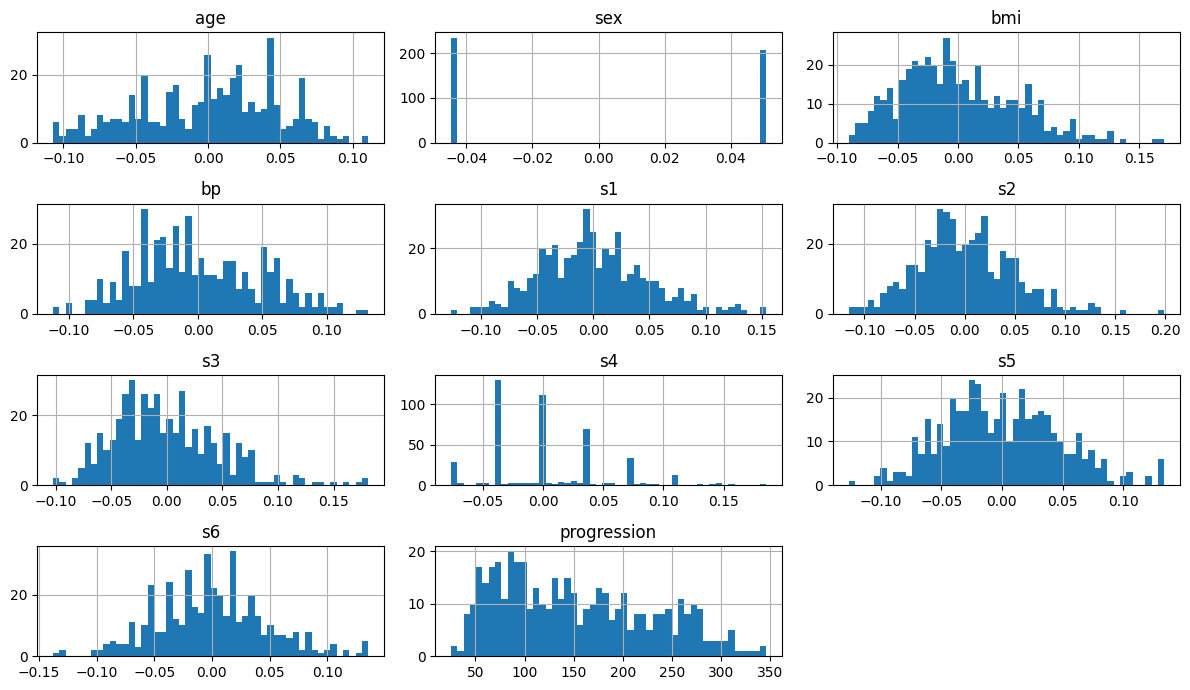

In [5]:
import matplotlib.pyplot as plt
diabetes_df.hist(bins=50, figsize=(12,7))
plt.tight_layout()
plt.show()

Split the dataframe into a training and test set with 20% of the data being in the test set.

In [6]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(diabetes_df, test_size=0.2, random_state=421)

Define a correlation matrix and look at values highly correlated with the target.

In [7]:
corr = train_set.corr()
print("Top 3 correlated features:")
print(corr['progression'].drop('progression').sort_values(key=abs, ascending=False)[:3])

Top 3 correlated features:
bmi    0.625367
s5     0.563989
bp     0.437698
Name: progression, dtype: float64


Plot the correlation matrix with a Seaborn heatmap.

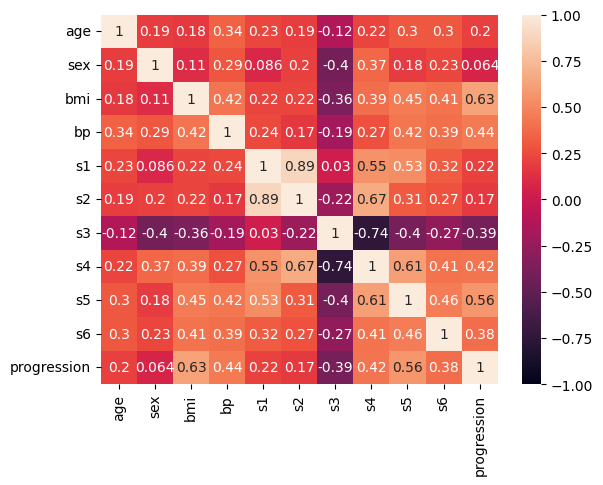

In [8]:
import seaborn as sns
sns.heatmap(corr, annot=True, vmin=-1)
plt.show()

Use a Seaborn pairplot to look at the scatter plots of the three values with the highest target correlation. 

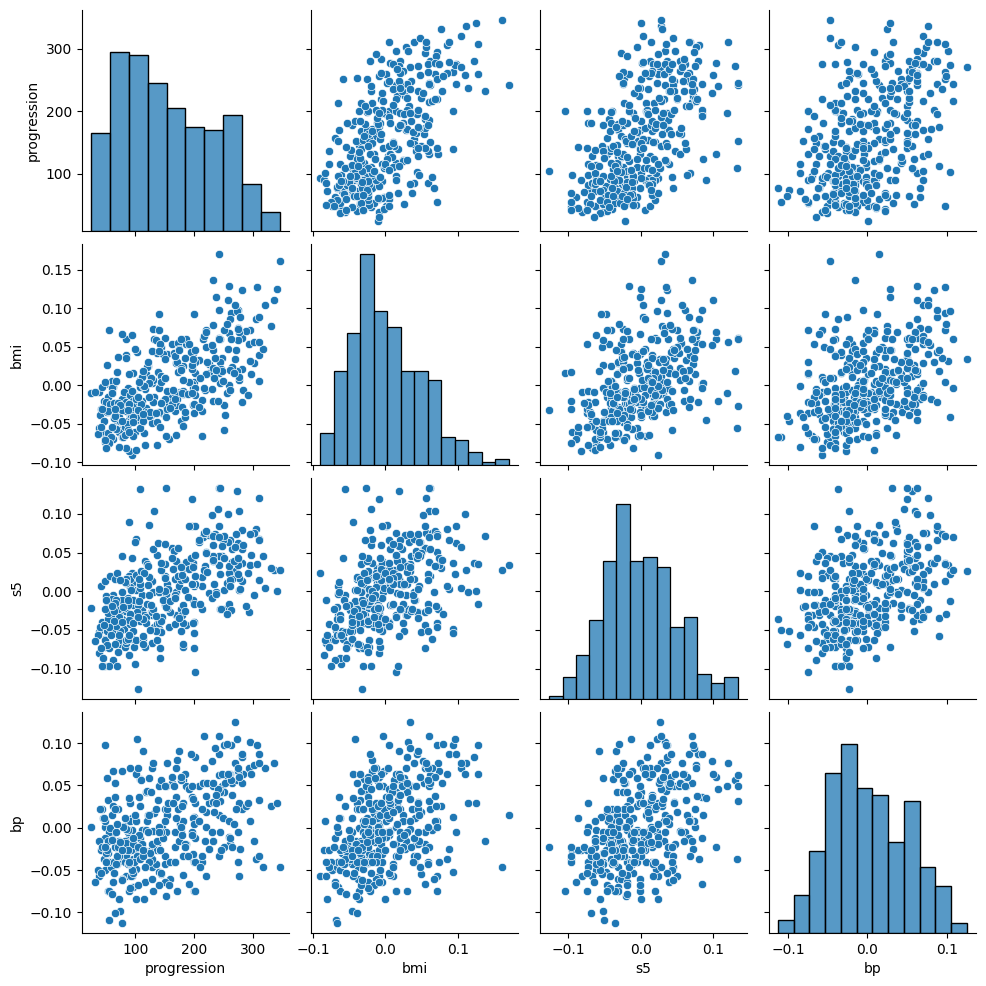

In [9]:
# Get the top 3 features including progression.  Progression will automatically be at the 
# top since the correlation is 1, so just grab the next 3 after that
top_features = corr['progression'].sort_values(key=abs, ascending=False)[:4].index
sns.pairplot(train_set[top_features])
plt.show()

Prepare a feature set by dropping the target from the training dataframe and copy the training target into a new dataframe.

In [10]:
features_train = train_set.drop('progression', axis=1)
target_train = train_set['progression']

## Part 2: Model training

Train a linear regression model using the training set and print the RMSE of the regression model on the training set. 

In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_regressor = LinearRegression()
linear_regressor.fit(features_train, target_train)
predictions = linear_regressor.predict(features_train)
linear_rmse = np.sqrt(mean_squared_error(target_train, predictions))

print(f"Linear Model RMSE: {linear_rmse:.2f}")

Linear Model RMSE: 53.62


Implement a cross_val_score on a decision tree regressor on the training set, then print out root mean and standard deviation of the cross-validation scores

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

tree_regressor = DecisionTreeRegressor(random_state=421)
scores = cross_val_score(tree_regressor, features_train, target_train, scoring='neg_mean_squared_error', cv=10)
tree_rmse = np.sqrt(-scores)

print(f"Tree Regressor RMSEs: {tree_rmse}")
print(f"RMSE Mean: {tree_rmse.mean():.2f}")
print(f"RMSE Standard Deviation: {tree_rmse.std():.2f}")

Tree Regressor RMSEs: [77.21776566 91.85526054 62.04814439 92.38336276 89.3943111  69.16336768
 89.34379825 77.9329382  86.95335367 65.60444236]
RMSE Mean: 80.19
RMSE Standard Deviation: 10.85


Do the same as above for a RandomForestRegressor

In [13]:
from sklearn.ensemble import RandomForestRegressor

forest_regressor = RandomForestRegressor(random_state=421)
scores = cross_val_score(forest_regressor, features_train, target_train, scoring='neg_mean_squared_error', cv=10)
forest_rmse = np.sqrt(-scores)

print(f"Random Forest Regressor RMSEs: {forest_rmse}")
print(f"RMSE Mean: {forest_rmse.mean():.2f}")
print(f"RMSE Standard Deviation: {forest_rmse.std():.2f}")

Random Forest Regressor RMSEs: [56.34446244 64.14289726 39.44662692 60.11620228 77.96156833 53.97038291
 58.89450003 42.71093972 65.94620481 47.74551007]
RMSE Mean: 56.73
RMSE Standard Deviation: 10.91


The linear regression model performed the best with a RMSE of 53.62, with the Random Forest Regressor in a close second with an RMSE of 56.73 +- 10.91

## Part 3: Model Tuning

Print out the parameters of the Random Forest Regressor

In [14]:
forest_regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 421,
 'verbose': 0,
 'warm_start': False}

Perform a grid search cross-validation with the following values: n_estimators: 3,10,30 and max_features: 2,4,6,8, as well as the following
experiment: bootstrap: False, n_estimators: 3,10 and max_features: 2,3,4. 
Print out the best parameters and the best performing model based on this grid search.

In [15]:
from sklearn.model_selection import GridSearchCV

params = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, 
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

grid_search = GridSearchCV(forest_regressor, param_grid=params, scoring='neg_mean_squared_error')
grid_search.fit(features_train, target_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Model: {grid_search.best_estimator_}")

Best Parameters: {'max_features': 6, 'n_estimators': 30}
Best Model: RandomForestRegressor(max_features=6, n_estimators=30, random_state=421)


Using the cv_results dictionary, print out the rmse of each feature combination for comparison. Also print out the
feature importances of the best performing grid search model. Describe how it compares with the correlation matrix from earlier.

In [16]:
print("RMSE   Parameters")
print("-----  ----------")
for score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
    print(f"{np.sqrt(-score):.2f}  {params}")
print()
print("Importance of each feature in the best performing model:")
for feature, importance in zip(grid_search.best_estimator_.feature_names_in_, grid_search.best_estimator_.feature_importances_):
    print(f"\t{feature:<3} - {importance:.3f}")

RMSE   Parameters
-----  ----------
67.23  {'max_features': 2, 'n_estimators': 3}
61.52  {'max_features': 2, 'n_estimators': 10}
58.14  {'max_features': 2, 'n_estimators': 30}
66.01  {'max_features': 4, 'n_estimators': 3}
59.95  {'max_features': 4, 'n_estimators': 10}
58.18  {'max_features': 4, 'n_estimators': 30}
65.66  {'max_features': 6, 'n_estimators': 3}
59.04  {'max_features': 6, 'n_estimators': 10}
57.49  {'max_features': 6, 'n_estimators': 30}
64.18  {'max_features': 8, 'n_estimators': 3}
60.56  {'max_features': 8, 'n_estimators': 10}
58.26  {'max_features': 8, 'n_estimators': 30}
67.19  {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
60.77  {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
65.04  {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
60.84  {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
66.54  {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
59.15  {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

Impo

The feature imporatance values show that `bmi` and `s5` are the most importance features, which matches strongly with the correlation matrix in part 1.  BMI has a correlation of 0.63 and feature importance of 0.28 while S5 has a correlation of 0.56 and feature importance of 0.27.

## Part 4: Model Evaluation

Document the best-performing model between the single feature model trained in Assignment 1, and the models trained in part 2 and 3 of this assignment. Evaluate the best performing model against the test set. Save this model for future use.

The RMSE of the model in assignment 1 is 63.44  
The RMSE of the linear regressor model is 53.62  
The RMSE of the decision tree regressor is 80.19 +- 10.8  
The RMSE of the base random forest regressor is 56.73 +- 10.9  
The RMSE of the tuned random forest regressor is 57.49

This means the best performing model is the linear regressor.

In [17]:
final_model = linear_regressor

features_test = test_set.drop('progression', axis=1)
target_test = test_set['progression']

test_predictions = final_model.predict(features_test)
test_rmse = np.sqrt(mean_squared_error(target_test, test_predictions))
print(f"RMSE of the test set: {test_rmse:.2f}")

RMSE of the test set: 54.02
